## Calculating the orientation between MFG and coil direction

In [50]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

### Read in the orientation file from the coil file...

In [53]:
# this id did not have Localite recordings saved: '0da133e9dcc29cb523df7320430261782234bdd0'
mydir=pd.read_csv('/work/HASH/direction_IFG_SULCUS_ALL_HASH.csv')
import json

biglist_01 = []
for i in range(mydir.shape[0]):
#for i in range(3):    
    ptid = mydir.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        ix1 = np.where(mydir['id_hash']==ptid)
        mfg = np.array(mydir[['x','y','z']].iloc[ix1])


        #str(ptid).rjust(2, '0')
        coilloc = pd.read_csv('/work/HASH/location_' + ptid + '.csv', header=None)
        loa = [] #list of angles
        for j in range(coilloc.shape[0]):
            coil = np.array((-1)*coilloc[[1,5,9]].iloc[j]) #1,5,9 are py the y direction -1 is because it shows backwards
            loa.append(np.rad2deg(angle_between(mfg,coil))[0])
        print(i)
        biglist_01.append(loa)
        with open('/work/HASH/FS2-IFG-SULCUS-TMSCOIL-ORIENTATION-sub-' + ptid + '.json', 'w') as fout:
            json.dump(loa, fout)   

with open('/work/HASH/FS2-IFG-SULCUS-TMSCOIL-ORIENTATION-ALL-fin.json', 'w') as fout:
    json.dump(biglist_01, fout)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [12]:
import json
biglist_01 = []
for i in range(mydir.shape[0]):
    ptid = mydir.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        f = open('/work/HASH/FS2-IFG-SULCUS-TMSCOIL-ORIENTATION-sub-' + ptid + '.json')
        list01 = json.load(f)
        f.close()
        biglist_01.append(list01)
with open('/work/HASH/FS2-IFG-SULCUS-TMSCOIL-ORIENTATION-sub-', 'w') as fout:
    json.dump(biglist_01, fout) 

<AxesSubplot:ylabel='Count'>

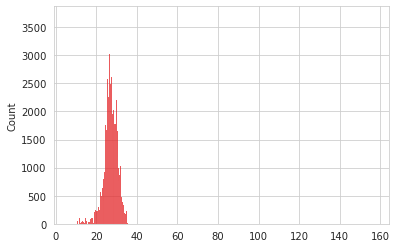

In [54]:
#an example of the orientation
import seaborn as sns
sns.histplot(biglist_01[38])

In [59]:
mymed=pd.DataFrame(index=range(mydir.shape[0]),columns=range(2))
mymed.columns=['ptid','mean']
#mymed
m=0
for i in range(mydir.shape[0]):
#for i in range(3):    
    ptid = mydir.id_hash[i]
    if (ptid!='0da133e9dcc29cb523df7320430261782234bdd0'):
        marr = np.array(biglist_01[m])
        ix = np.where(marr>90)
        marr[ix[0]]=180-marr[ix[0]]
        mymed['mean'].loc[i]=np.mean(marr)
        mymed['ptid'].loc[i]=ptid
        m=m+1
    else:
        mymed['ptid'].loc[i]='0da133e9dcc29cb523df7320430261782234bdd0'

In [62]:
mymed.columns=[['id_hash','coil_ang_mean']]
mymed.to_csv('/src/notebooks/TMS/Angles-ifg-rTMS10Hz-hash.csv')

In [63]:

angles = pd.read_csv('/src/notebooks/TMS/Angles-ifg-rTMS10Hz-hash.csv')
distance = pd.read_csv('/src/notebooks/TMS/Distance-rTMS10Hz-hash.csv')
distance_ind = pd.read_csv('/src/notebooks/TMS/IND-Distance-rTMS10Hz-hash.csv')
distance_ind.columns=['_','distind','peakmin','id_hash']

clinical = pd.read_csv('/src/notebooks/TMS/clinical-slope-rTMS10Hz-hash.csv')

alldata = clinical.merge(distance, on='id_hash').merge(angles, on='id_hash').drop(columns=[ 'Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'])
alldata

,id_hash,slope,intercept,dist,coil_ang_mean
0,94c668d3941a0597c05d4277597c2460c5235d8b,-0.838871,33.268984,8.084501,27.065442
1,001bda980325893f81559bd2805fd2ecee67abcd,-0.960718,34.539190,23.633079,29.687708
2,1c8838b784ebd917dc8b7a84fa45e22d40f411f5,-0.644803,30.043625,22.479815,29.269882
3,8874006084fe8e32904e6e83a54e098c965302a8,-1.052827,29.602343,21.449725,15.446352
4,8960d6d7ab7eda524461283e44e70b889560e124,-1.314975,23.964017,5.746111,22.477385
5,59c31c4832a97125923a86795ccb8f357c242318,-0.587607,27.165221,17.743540,28.276860
6,a39b412ae04c99000f61e4c2c63ee6a49e5308ad,-1.539147,20.442801,25.046627,28.849966
7,87061e4577c326359ab9db05e352b7b37e72eb99,-1.404316,26.444081,9.692665,19.811773
8,f6463c25418b6773c9358c41d759cd3207f66bd7,-2.318776,23.754906,18.061072,15.756076
9,51e5a2e2481e577ff5a491fa1e628adc8eb57c04,-1.985569,22.291094,4.211994,22.777474


In [64]:
import numpy as np
allex = alldata.copy()
allex['resp']=0
allex['resp'].iloc[np.where(alldata['slope']<np.median(alldata['slope']))]=1
allex[['id_hash','resp']].to_csv('/src/notebooks/TMS/responders.csv')

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [65]:
negcorr = pd.read_csv('/src/notebooks/TMS/SGC-DLPC-corr-PA-small-rTMS10hz-hash.csv') #this is the correct one
negcorr.columns=['_','SGC_DLPFC_corr','median','id_hash']
negcorr

,_,SGC_DLPFC_corr,median,id_hash
0,3,0.448053,0.485332,59c31c4832a97125923a86795ccb8f357c242318
1,7,0.114765,0.115970,87061e4577c326359ab9db05e352b7b37e72eb99
2,11,-0.082023,-0.064883,a39b412ae04c99000f61e4c2c63ee6a49e5308ad
3,15,-0.110033,-0.104348,f6463c25418b6773c9358c41d759cd3207f66bd7
4,19,-0.268641,-0.268370,51e5a2e2481e577ff5a491fa1e628adc8eb57c04
5,23,-0.146895,-0.138407,ceadf0b82c1c64aa2c88de16bd10e467c2fc6359
6,27,-0.341714,-0.379038,3b7434c4cc2e7db6beecd789fcd897884f4b9058
7,31,0.145658,0.170925,d90ccaf676390caff71219ed511524bf36e5fc64
8,35,0.220102,0.218483,af72ea4c54093ce7b3396f418c6218c4c3c4f946
9,39,-0.342898,-0.343871,494001dd6c92a1776c10f46d034be21222b8babb


In [66]:
alldata2=alldata.merge(negcorr[['SGC_DLPFC_corr','id_hash']], on='id_hash').merge(distance_ind,on='id_hash').drop(columns=['_'])
alldata2

,id_hash,slope,intercept,dist,coil_ang_mean,SGC_DLPFC_corr,distind,peakmin
0,59c31c4832a97125923a86795ccb8f357c242318,-0.587607,27.165221,17.743540,28.276860,0.448053,21.332081,-0.603466
1,a39b412ae04c99000f61e4c2c63ee6a49e5308ad,-1.539147,20.442801,25.046627,28.849966,-0.082023,51.703817,-0.360000
2,87061e4577c326359ab9db05e352b7b37e72eb99,-1.404316,26.444081,9.692665,19.811773,0.114765,44.614620,-0.342203
3,f6463c25418b6773c9358c41d759cd3207f66bd7,-2.318776,23.754906,18.061072,15.756076,-0.110033,26.360767,-0.369137
4,51e5a2e2481e577ff5a491fa1e628adc8eb57c04,-1.985569,22.291094,4.211994,22.777474,-0.268641,21.914413,-0.373776
5,ceadf0b82c1c64aa2c88de16bd10e467c2fc6359,-1.596565,21.679293,12.757861,29.016112,-0.146895,18.376420,-0.343904
6,3b7434c4cc2e7db6beecd789fcd897884f4b9058,-1.205294,19.686538,9.031569,12.487773,-0.341714,30.671867,-0.474461
7,af72ea4c54093ce7b3396f418c6218c4c3c4f946,-1.094882,29.894612,21.286766,29.818288,0.220102,30.455274,-0.602404
8,d90ccaf676390caff71219ed511524bf36e5fc64,-1.267232,25.868256,7.984179,9.375433,0.145658,30.924651,-0.508398
9,494001dd6c92a1776c10f46d034be21222b8babb,-2.600556,24.253295,17.076283,27.785500,-0.342898,5.680381,-0.450256


<AxesSubplot:xlabel='SGC_DLPFC_corr', ylabel='coil_ang_mean'>

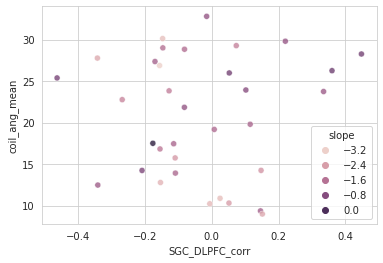

In [67]:
import seaborn as sns
sns.scatterplot(data=alldata2, y= 'coil_ang_mean', x='SGC_DLPFC_corr',alpha = .8, hue='slope', cmap = 'seismic')

In [68]:
import statsmodels.formula.api as smf 
est = smf.ols(formula='slope ~ coil_ang_mean', data=alldata).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  slope   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.179
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0479
Time:                        16:25:23   Log-Likelihood:                -46.938
No. Observations:                  40   AIC:                             97.88
Df Residuals:                      38   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2923      0.383     -5.979      0.000      -3.069      -1.516
coil_ang_mean     0.0353      0.017      2.044      0.048       0.000       0.070
==============================================================================
Omnibus:                        1.538   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                0.658
Skew:                          -0.183   Prob(JB):                        0.720
Kurtosis:                       3.511   Cond. No.                         67.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
est = smf.ols(formula='slope ~ coil_ang_mean + SGC_DLPFC_corr', data=alldata2).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  slope   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.333
Date:                Thu, 07 Mar 2024   Prob (F-statistic):              0.278
Time:                        16:25:31   Log-Likelihood:                -41.170
No. Observations:                  34   AIC:                             88.34
Df Residuals:                      31   BIC:                             92.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1727      0.451     -4.815      0.000      -3.093      -1.252
coil_ang_mean      0.0278      0.020      1.360      0.184      -0.014       0.069
SGC_DLPFC_corr     0.6258      0.729      0.858      0.397      -0.862       2.113
==============================================================================
Omnibus:                        1.143   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.368
Skew:                           0.180   Prob(JB):                        0.832
Kurtosis:                       3.360   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

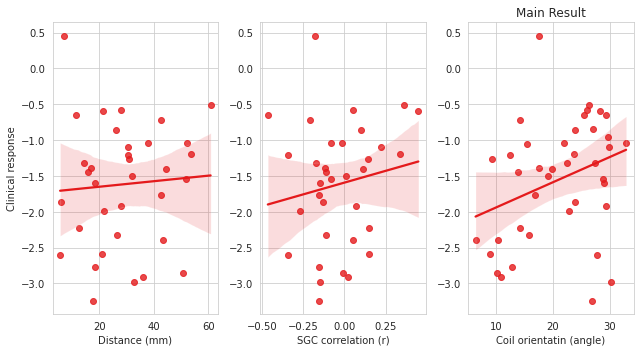

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_palette("Set1")
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(9, 5))
plt.title('Main Result')

# Panel A
sns.regplot(data=alldata2, y= 'slope', x='distind', ax = axes[0])
axes[0].set_title('')

#Panel B
sns.regplot(data=alldata2, y= 'slope', x='SGC_DLPFC_corr', ax = axes[1])
axes[0].set_title('')

# Panel C
sns.regplot(data=alldata, y= 'slope', x='coil_ang_mean', ax = axes[2])
axes[1].set_title('')

# Remove redundant subplot labels
axes[0].set_ylabel('Clinical response')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Distance (mm)')
axes[1].set_xlabel('SGC correlation (r)')
axes[2].set_xlabel('Coil orientatin (angle)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [71]:
import scipy.stats
scipy.stats.pearsonr(alldata['slope'], alldata['coil_ang_mean'])

(0.3147634696136201, 0.04790425211486853)

In [72]:
scipy.stats.pearsonr(alldata2['slope'], alldata2['SGC_DLPFC_corr'])

(0.15554783006301998, 0.3797101134932081)

In [73]:
scipy.stats.pearsonr(alldata2['slope'], alldata2['distind'])

(0.06708932969974374, 0.7061828820173472)

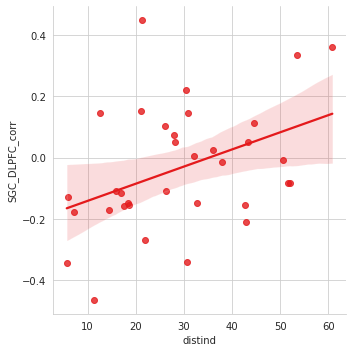

In [74]:
sns.lmplot(data=alldata2, x= 'distind', y='SGC_DLPFC_corr') #as expected the closer to the peak the more negative the correlation

In [75]:
scipy.stats.pearsonr(alldata2['distind'], alldata2['SGC_DLPFC_corr'])

(0.4100635166908634, 0.016012790731584847)